In [3]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape((50000, 32, 32, 3))
x_test  = x_test.reshape((10000, 32, 32, 3))

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
opt = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt, metrics=['accuracy'], 
              loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, batch_size=256, 
                    validation_data=(x_test, y_test), epochs=70, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       147584    
                                                      

Epoch 41/70
196/196 [==============================] - 6s 32ms/step - loss: 0.0376 - accuracy: 0.9874 - val_loss: 1.9550 - val_accuracy: 0.7166
Epoch 42/70
196/196 [==============================] - 6s 32ms/step - loss: 0.0462 - accuracy: 0.9833 - val_loss: 1.9855 - val_accuracy: 0.7120
Epoch 43/70
196/196 [==============================] - 6s 32ms/step - loss: 0.0408 - accuracy: 0.9863 - val_loss: 1.9907 - val_accuracy: 0.7190
Epoch 44/70
196/196 [==============================] - 6s 32ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 2.1793 - val_accuracy: 0.7139
Epoch 45/70
196/196 [==============================] - 6s 32ms/step - loss: 0.0448 - accuracy: 0.9845 - val_loss: 2.1262 - val_accuracy: 0.7110
Epoch 46/70
196/196 [==============================] - 6s 32ms/step - loss: 0.0264 - accuracy: 0.9910 - val_loss: 2.2075 - val_accuracy: 0.7099
Epoch 47/70
196/196 [==============================] - 6s 32ms/step - loss: 0.0358 - accuracy: 0.9880 - val_loss: 2.0894 - val_accuracy:

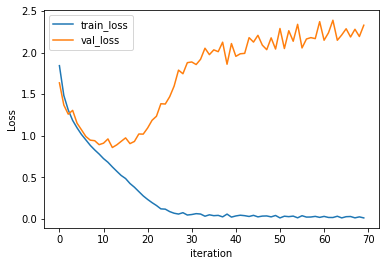

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

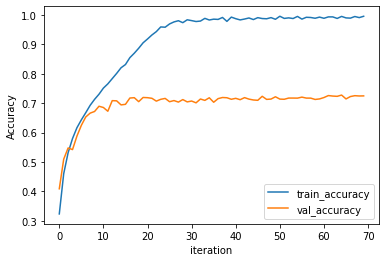

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()